### Model 서브클래싱

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np

#### 이전 예제를 서브클래싱 모델로 다시 만들기

In [2]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

**간단한 서브클래싱 모델**

In [3]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [4]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [5]:
model.summary()

Model: "customer_ticket_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
concatenate (Concatenate)    multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  1286464   
_________________________________________________________________
dense_1 (Dense)              multiple                  65        
_________________________________________________________________
dense_2 (Dense)              multiple                  260       
Total params: 1,286,789
Trainable params: 1,286,789
Non-trainable params: 0
_________________________________________________________________


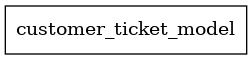

In [6]:
keras.utils.plot_model(model, "subclass_ticket_classifier.png", show_shapes=True)

In [7]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 [==============================] - 1s 8ms/step - loss: 12.3835 - output_1_loss: 0.3459 - output_2_loss: 12.0377 - output_1_mean_absolute_error: 0.5118 - output_2_accuracy: 0.0672


#### 주의: 서브클래싱된 모델이 지원하지 않는 것